In [25]:
# Imports
from clases.red_rddas_model import RedRddasModel
from clases.experiment_model import ExperimentModel

import ray
import time
import pandas as pd
import numpy as np
import pickle  # library to serialization object

from itertools import product  # generate combinations of numbers

# Ray Configurations
# ray.shutdown()
#runtime_env = {"working_dir": "/home/reynaldo/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
#ray.init(address='ray://172.17.163.253:10001', runtime_env=runtime_env, log_to_driver=False)
# ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False, num_cpus=12)
# ray.init(log_to_driver=False, num_cpus=12)

In [26]:
# Parameters
n_rdds = 5
n_of_variables_rdda = 5
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"

# Generate the RDDA
o_rdda = RedRddasModel(number_of_rddas=n_rdds,number_of_variables_rdda=n_of_variables_rdda,number_of_signals_rdda=n_of_signals_rdda,number_exit_variables=n_exit_variables,number_clauses_function=n_clauses_function)

# Show the RDDA
o_rdda.show_description()

# Generate the RDDs
o_rdda.generate_rddas(type_network=type_network)

# Show the list of RDDs
o_rdda.show_rdds()

# Find the attractors by RDD
o_rdda = RedRddasModel.find_attractors_rddas(o_rdda)

# Show the attractors of the RDDs by Signal
o_rdda.show_attractors()

# Calculation the Attractor Pairs
o_rdda = RedRddasModel.calculation_compatible_pairs(o_rdda)

# Show the list of attractor pairs
o_rdda.show_attractor_pairs()

# Assembly the attractor fields
l_partial_paths = o_rdda.assembly_attractor_fields_pruning(o_rdda)

# Show the list of attractor fields
o_rdda.show_attractor_fields_detail()

NETWORK RDDA DESCRIPTION
Number of RDDs : 5
Number of variables by RDD : 5
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 5
Maximum number of clauses by function : 5
List of RDDs of the RDDA
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2, 3, 4, 5]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 2
Variables : [10, 9]
Name Variable : 26
Coupling Function :  10 ∨ 9 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 3
Variables : [14, 15]
Name Variable : 27
Coupling Function :  14 ∨ 15 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[3], [4, 5]]
V: 2 CNF :[[2]]
V: 3 CNF :[[27, 26, 1], [2, 27, 5]]
V: 4 CNF :[[2, 26], [26]]
V: 5 CNF :[[3, 5]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[6, 7, 8, 9, 10]
List of coupling signals : 
---------------
Networ

In [27]:
# # partial_solutions = [ iteration = [] ]
# for iteration in l_partial_solutions:
#     print("Number of Partial Solutions:", len(iteration))
#     for partial_solution in iteration:
#         print("Part :", partial_solution)

# print(o_rdda.list_signal_pairs)
# for l_pairs in o_rdda.list_signal_pairs:
#     print("Number of pairs from list :", len(l_pairs))

# Assembly the attractor fields and save the partial solutions
df_exec_experiment = o_rdda.assembly_attractor_fields_experiment()
df_exec_experiment

OUTPUT 80
Begin Iteration
# Elements group 1: 80 # Elements group 2: 38 # Partial Solutions: 212
Part : [[0, 15], [0, 29]]
Part : [[0, 15], [0, 31]]
Part : [[0, 19], [0, 29]]
Part : [[0, 19], [0, 31]]
Part : [[0, 24], [0, 29]]
Part : [[0, 24], [0, 31]]
Part : [[1, 15], [1, 29]]
Part : [[1, 15], [1, 31]]
Part : [[1, 19], [1, 29]]
Part : [[1, 19], [1, 31]]
Part : [[1, 24], [1, 29]]
Part : [[1, 24], [1, 31]]
Part : [[2, 15], [2, 29]]
Part : [[2, 15], [2, 31]]
Part : [[2, 19], [2, 29]]
Part : [[2, 19], [2, 31]]
Part : [[2, 24], [2, 29]]
Part : [[2, 24], [2, 31]]
Part : [[3, 15], [3, 29]]
Part : [[3, 15], [3, 31]]
Part : [[3, 19], [3, 29]]
Part : [[3, 19], [3, 31]]
Part : [[3, 24], [3, 29]]
Part : [[3, 24], [3, 31]]
Part : [[4, 15], [4, 29]]
Part : [[4, 15], [4, 31]]
Part : [[4, 19], [4, 29]]
Part : [[4, 19], [4, 31]]
Part : [[4, 24], [4, 29]]
Part : [[4, 24], [4, 31]]
Part : [[5, 15], [5, 29]]
Part : [[5, 15], [5, 31]]
Part : [[5, 19], [5, 29]]
Part : [[5, 19], [5, 31]]
Part : [[5, 24], [5

,first_list_pairs,second_list_pairs,base_list_before,base_list_after,base_list_iterative
0,80,38,80,212,80
1,38,90,212,92,3040
2,90,117,92,704,273600
3,117,32,704,326,32011200
4,32,51,326,163,1024358400
5,51,115,163,89,52242278400
6,115,54,89,47,6007862016000
7,54,52,47,136,324424548864000
8,52,32,136,80,16870076540928000


In [28]:
# Indicators about execution of the method
df_exec_experiment['iterative_after'] = df_exec_experiment['base_list_iterative'] * df_exec_experiment['second_list_pairs']
df_exec_experiment['percent_methods'] = 100 - ( (df_exec_experiment['base_list_after'] * 100) / df_exec_experiment['iterative_after'])
df_exec_experiment

,first_list_pairs,second_list_pairs,base_list_before,base_list_after,base_list_iterative,iterative_after,percent_methods
0,80,38,80,212,80,3040,93.026316
1,38,90,212,92,3040,273600,99.966374
2,90,117,92,704,273600,32011200,99.997801
3,117,32,704,326,32011200,1024358400,99.999968
4,32,51,326,163,1024358400,52242278400,100.000000
5,51,115,163,89,52242278400,6007862016000,100.000000
6,115,54,89,47,6007862016000,324424548864000,100.000000
7,54,52,47,136,324424548864000,16870076540928000,100.000000
8,52,32,136,80,16870076540928000,539842449309696000,100.000000


### Graph the values of every method

In [29]:
import matplotlib.pyplot as plt
df_exec_experiment['id'] = range(1, len(df_exec_experiment) + 1)
df_exec_experiment.set_index('id')
df_exec_experiment

,first_list_pairs,second_list_pairs,base_list_before,base_list_after,base_list_iterative,iterative_after,percent_methods,id
0,80,38,80,212,80,3040,93.026316,1
1,38,90,212,92,3040,273600,99.966374,2
2,90,117,92,704,273600,32011200,99.997801,3
3,117,32,704,326,32011200,1024358400,99.999968,4
4,32,51,326,163,1024358400,52242278400,100.000000,5
5,51,115,163,89,52242278400,6007862016000,100.000000,6
6,115,54,89,47,6007862016000,324424548864000,100.000000,7
7,54,52,47,136,324424548864000,16870076540928000,100.000000,8
8,52,32,136,80,16870076540928000,539842449309696000,100.000000,9


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


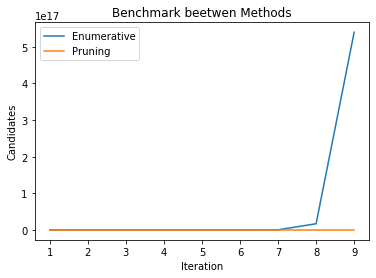

In [37]:
import matplotlib.pyplot as plt
x_axs = list(df_exec_experiment['id'])
y_axs_enumerate = list(df_exec_experiment['iterative_after'])
y_axs_pruning = list(df_exec_experiment['base_list_after'])

fig, ax = plt.subplots()
ax.plot(x_axs, y_axs_enumerate, label="Enumerative")
ax.plot(x_axs, y_axs_pruning, label="Pruning")
ax.legend()
plt.xlabel("Iteration")
plt.ylabel("Candidates")
plt.title("Benchmark beetwen Methods")
plt.savefig('data/exp_benchmark_enumerative_pruning_fig.eps')
plt.show()

### Generate the latex table with pandas

In [43]:
df = df_exec_experiment[['first_list_pairs','second_list_pairs', 'base_list_after', 'iterative_after']].copy().\
    rename(columns={'first_list_pairs': 'Lista Base', 'second_list_pairs': 'Lista Adicionada', 'base_list_after': 'Precandidatos Podas', 'iterative_after' : 'Precandidatos Enumerativo'})
df

,Lista Base,Lista Adicionada,Precandidatos Podas,Precandidatos Enumerativo
0,80,38,212,3040
1,38,90,92,273600
2,90,117,704,32011200
3,117,32,326,1024358400
4,32,51,163,52242278400
5,51,115,89,6007862016000
6,115,54,47,324424548864000
7,54,52,136,16870076540928000
8,52,32,80,539842449309696000


In [44]:
# Export Dataframe to Latex a
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 Lista Base &  Lista Adicionada &  Precandidatos Podas &  Precandidatos Enumerativo \\
\midrule
         80 &                38 &                  212 &                       3040 \\
         38 &                90 &                   92 &                     273600 \\
         90 &               117 &                  704 &                   32011200 \\
        117 &                32 &                  326 &                 1024358400 \\
         32 &                51 &                  163 &                52242278400 \\
         51 &               115 &                   89 &              6007862016000 \\
        115 &                54 &                   47 &            324424548864000 \\
         54 &                52 &                  136 &          16870076540928000 \\
         52 &                32 &                   80 &         539842449309696000 \\
\bottomrule
\end{tabular}



In [31]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Create Dictionary
d_pairs = {}
v_key = 1
for v_pair in o_rdda.list_attractors_pairs:
    d_pairs[v_key] = v_pair
    v_key = v_key + 1

# Show the dictionary and the
for v_key, v_value in d_pairs.items():
    print(v_key, ":", v_value)

# List all the partial paths in the assembly attractor fields method
l_path_edge = []
for l_path in l_partial_paths:
    for path in l_path:
        # print(path)
        # select the final edges
        l_path_edge.append(path[-2:])
        # print(path[-2:])

# fill the edges with dict
l_edges_dict = []
for v_edge in l_path_edge:
    v_edge_dict = []
    for key, value in d_pairs.items():
        if value == v_edge[0]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[0])
            # print(key)
    for key, value in d_pairs.items():
        if value == v_edge[1]:
            v_edge_dict.append(key)
            # print(value)
            # print(v_edge[1])
            # print(key)
    l_edges_dict.append(v_edge_dict)
print(l_edges_dict)

1 : [0, 15]
2 : [0, 19]
3 : [0, 24]
4 : [1, 15]
5 : [1, 19]
6 : [1, 24]
7 : [2, 15]
8 : [2, 19]
9 : [2, 24]
10 : [3, 15]
11 : [3, 19]
12 : [3, 24]
13 : [4, 15]
14 : [4, 19]
15 : [4, 24]
16 : [5, 15]
17 : [5, 19]
18 : [5, 24]
19 : [6, 15]
20 : [6, 19]
21 : [6, 24]
22 : [7, 15]
23 : [7, 19]
24 : [7, 24]
25 : [8, 15]
26 : [8, 19]
27 : [8, 24]
28 : [9, 15]
29 : [9, 19]
30 : [9, 24]
31 : [10, 16]
32 : [10, 17]
33 : [10, 18]
34 : [10, 20]
35 : [10, 21]
36 : [10, 22]
37 : [10, 23]
38 : [10, 25]
39 : [10, 26]
40 : [10, 27]
41 : [11, 16]
42 : [11, 17]
43 : [11, 18]
44 : [11, 20]
45 : [11, 21]
46 : [11, 22]
47 : [11, 23]
48 : [11, 25]
49 : [11, 26]
50 : [11, 27]
51 : [12, 16]
52 : [12, 17]
53 : [12, 18]
54 : [12, 20]
55 : [12, 21]
56 : [12, 22]
57 : [12, 23]
58 : [12, 25]
59 : [12, 26]
60 : [12, 27]
61 : [13, 16]
62 : [13, 17]
63 : [13, 18]
64 : [13, 20]
65 : [13, 21]
66 : [13, 22]
67 : [13, 23]
68 : [13, 25]
69 : [13, 26]
70 : [13, 27]
71 : [14, 16]
72 : [14, 17]
73 : [14, 18]
74 : [14, 20]
75 

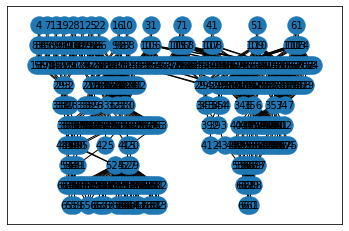

<Figure size 1.08e+06x540000 with 0 Axes>

In [32]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph with the paths
T = nx.Graph()
# T.add_nodes_from(d_pairs.keys())
T.add_edges_from(l_edges_dict)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()

# Generate full tree for enumerate method

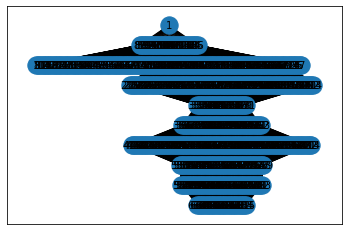

<Figure size 1.08e+06x540000 with 0 Axes>

In [33]:
# Generate the edges
l_aux = []
v_begin = 1
for element in o_rdda.list_signal_pairs:
    l_aux.append(list(range(v_begin , v_begin + len(element))))
    v_begin = v_begin + len(element)
# for element in l_aux:
#     print(element)

l_path_edge = []
for v_index in range(0,len(l_aux)-1):
    l_path_edge = l_path_edge + list(product(l_aux[v_index],l_aux[v_index+1]))
    # print(l_path_edge)

# Generate the graph with the paths
T = nx.Graph()
T.add_edges_from(l_path_edge)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(1200,600), dpi=900)
plt.show()